In [63]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('day_length_weight.csv', dtype='float')
y_train = train.pop('day')
x_train = torch.tensor(train.to_numpy(), dtype=torch.float).reshape(-1,2)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float).reshape(-1,1)


In [64]:
class LinearRegressionModel:
	def __init__(self):
		# requires_grad enables calculation of gradients
		self.W = torch.rand((2,1), requires_grad=True, dtype=torch.float)
		self.b = torch.rand((1,1), requires_grad=True, dtype=torch.float)

	# Predictor
	def f(self, x):
		return x @ self.W + self.b

	# Uses Mean Squared Error
	def loss(self, x, y):
			return torch.nn.functional.mse_loss(self.f(x), y)	
			# return torch.mean(torch.square(self.f(x) - y))

	def parameters(self):
		return [self.W, self.b]

In [67]:
model = LinearRegressionModel()

# Optimize: adjust W and b to minimize loss using stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), 1e-4)
for epoch in range(100_000):
    # Compute loss gradients
    model.loss(x_train, y_train).backward()
    optimizer.step()  # Perform optimization by adjusting W and b
    optimizer.zero_grad()  # Clear gradients for next step

W = tensor([[ 6.1349],
        [77.0016]], requires_grad=True), b = tensor([[-599.2286]], requires_grad=True), loss = tensor(55021.7852, grad_fn=<MseLossBackward>)


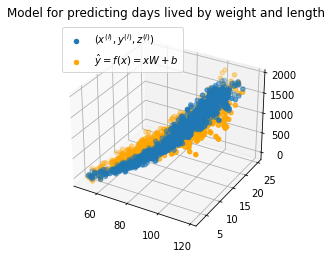

In [68]:

# Print model variables and loss
print("W = %s, b = %s, loss = %s" %(model.W, model.b, model.loss(x_train, y_train)))

# Visualize result
xt =x_train.t()[0]
yt =x_train.t()[1]

fig = plt.figure('Linear regression 3d')
ax = fig.add_subplot(projection='3d', title="Model for predicting days lived by weight and length")
# Plot
ax.scatter(xt.numpy(),  yt.numpy(), y_train.numpy(),label='$(x^{(i)},y^{(i)}, z^{(i)})$')
ax.scatter(xt.numpy(),yt.numpy() ,model.f(x_train).detach().numpy() , label='$\\hat y = f(x) = xW+b$', color="orange")
ax.legend()
plt.show()